In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import fetch_lfw_people, load_breast_cancer, load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

sns.set_theme()

### Visualize faces before PCA

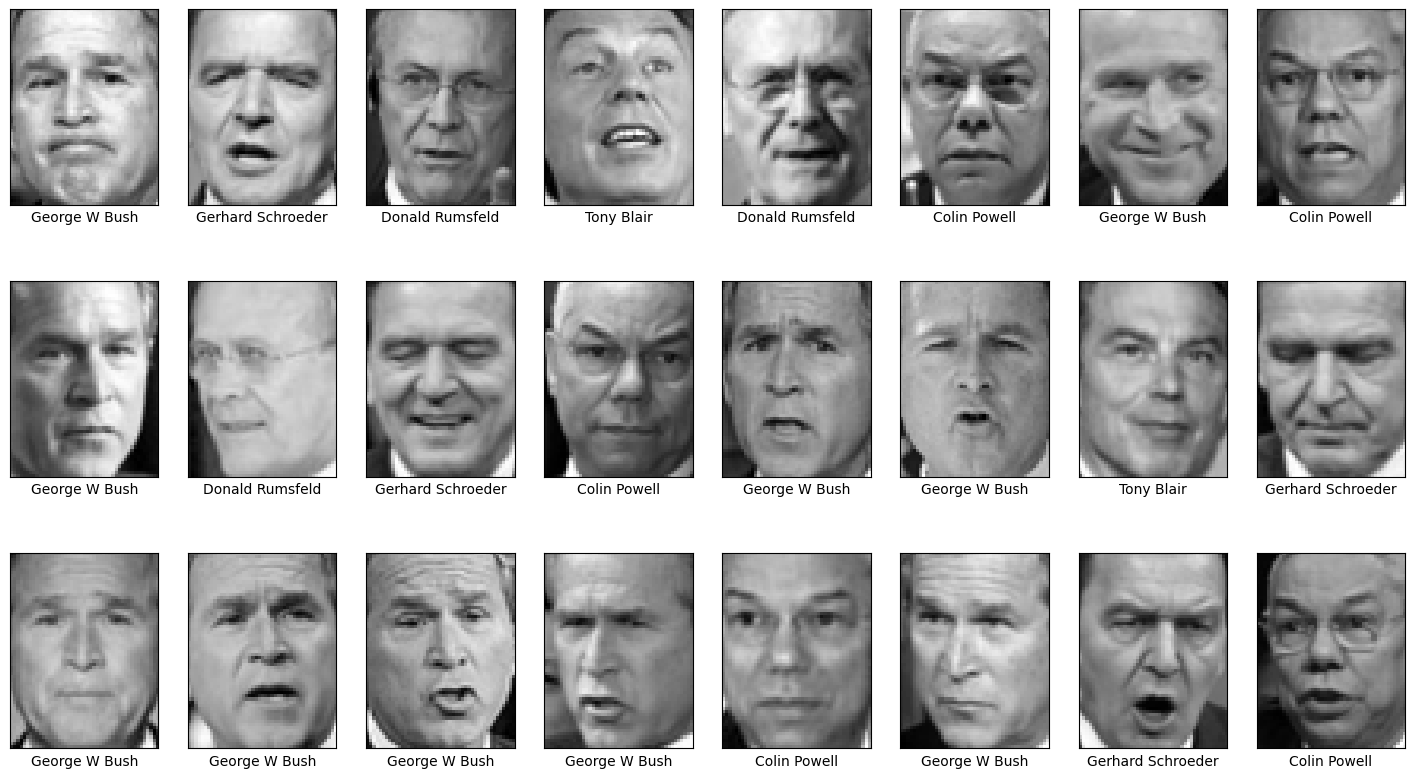

In [2]:
faces = fetch_lfw_people(min_faces_per_person=100, slice_=None)
faces.images = faces.images[:, 35:97, 39:86]
faces.data = faces.images.reshape(faces.images.shape[0], faces.images.shape[1] * faces.images.shape[2])

fig, ax = plt.subplots(3, 8, figsize=(18, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [6]:
pca = PCA(n_components=150, random_state=0)
pca_faces = pca.fit_transform(faces.data)
unpca_faces = pca.inverse_transform(pca_faces).reshape(1140, 62, 47)

### Visualize inverse PCA faces

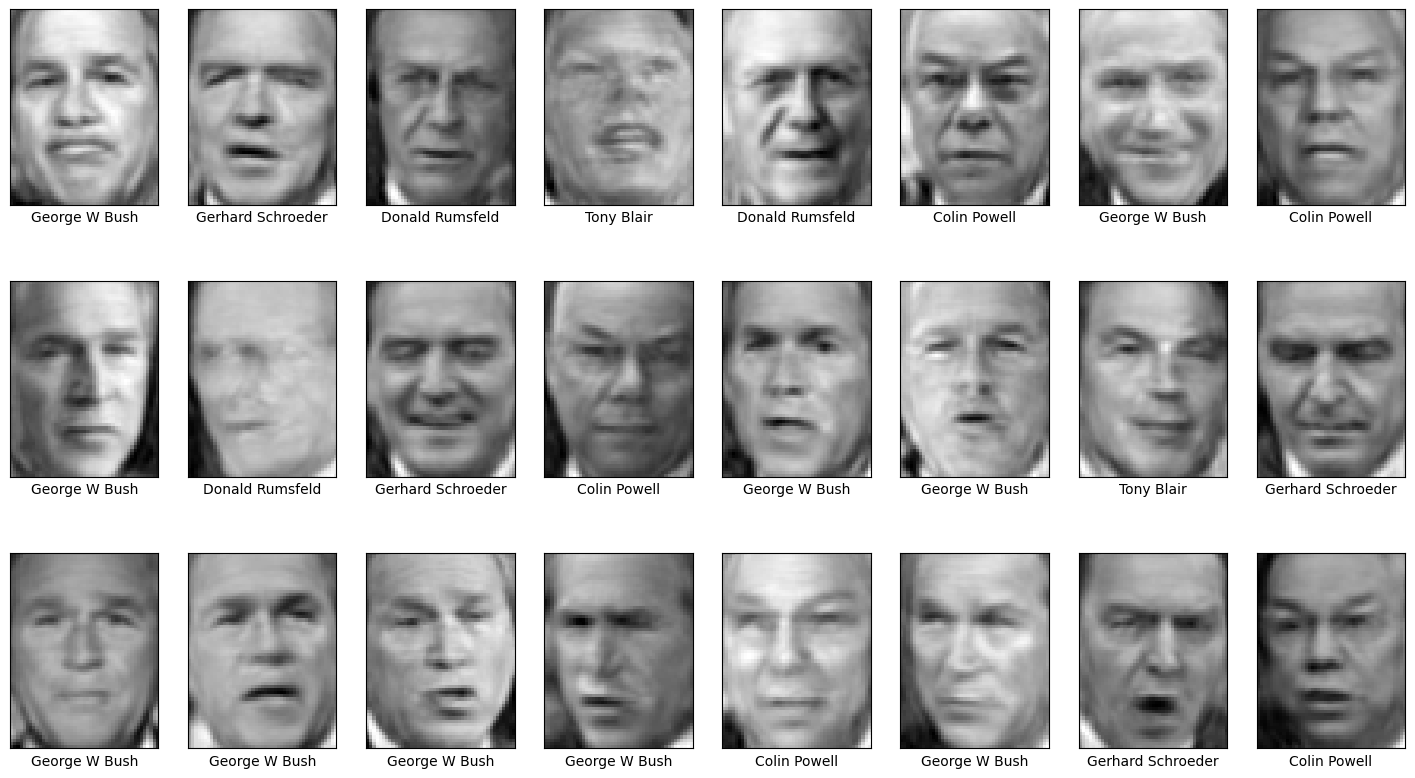

In [8]:
fig, ax = plt.subplots(3, 8, figsize=(18,10))

for i, axi in enumerate(ax.flat):
    axi.imshow(unpca_faces[i], cmap="gist_gray")
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

### Scree plot

Text(0, 0.5, 'Expalained Variance')

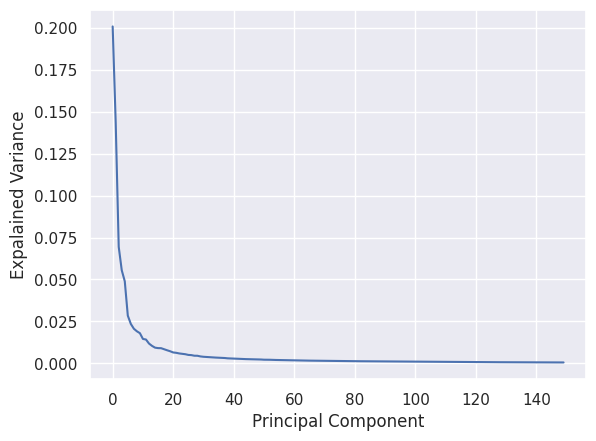

In [10]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Expalained Variance")

### Cumulative sum of Explained Variance

Text(0, 0.5, 'Cummulative Explained Variance')

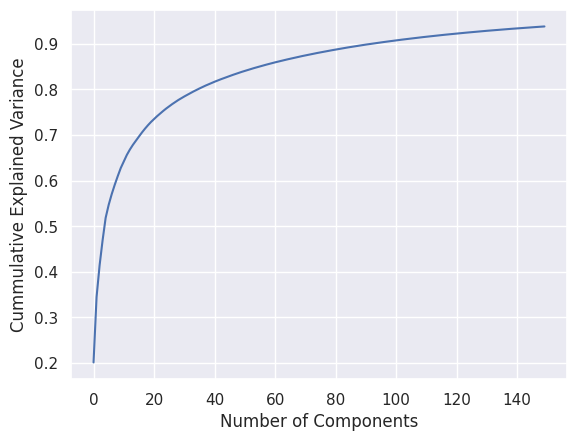

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cummulative Explained Variance")

### Filtering noise

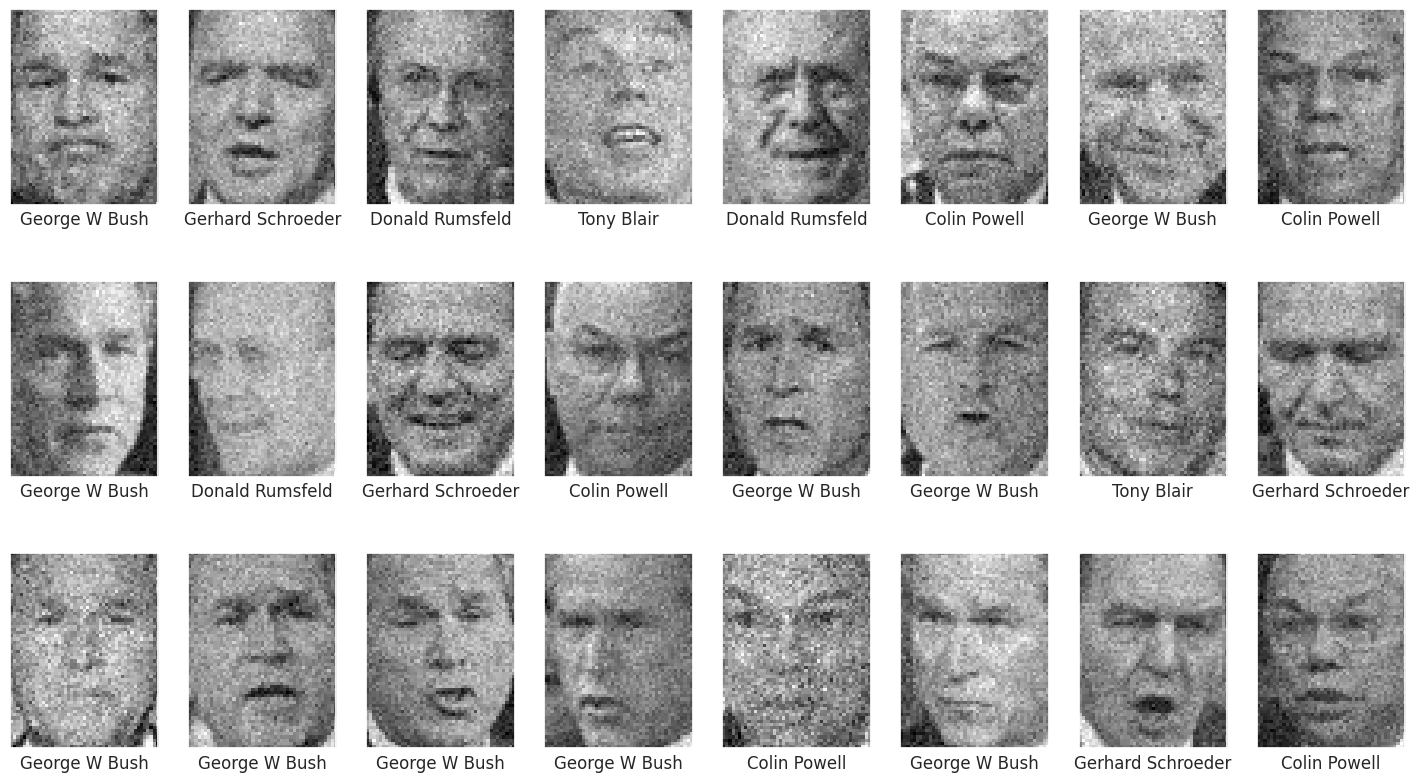

In [14]:
# adding noise to faces
np.random.seed(0)
noisy_faces = np.random.normal(faces.data, 0.0765)

fig, ax = plt.subplots(3, 8, figsize=(18,10))

for i, axi in enumerate(ax.flat):
    axi.imshow(noisy_faces[i].reshape(62, 47), cmap="gist_gray")
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [15]:
pca = PCA(0.8, random_state=0)
pca_faces = pca.fit_transform(noisy_faces)
pca.n_components_

179

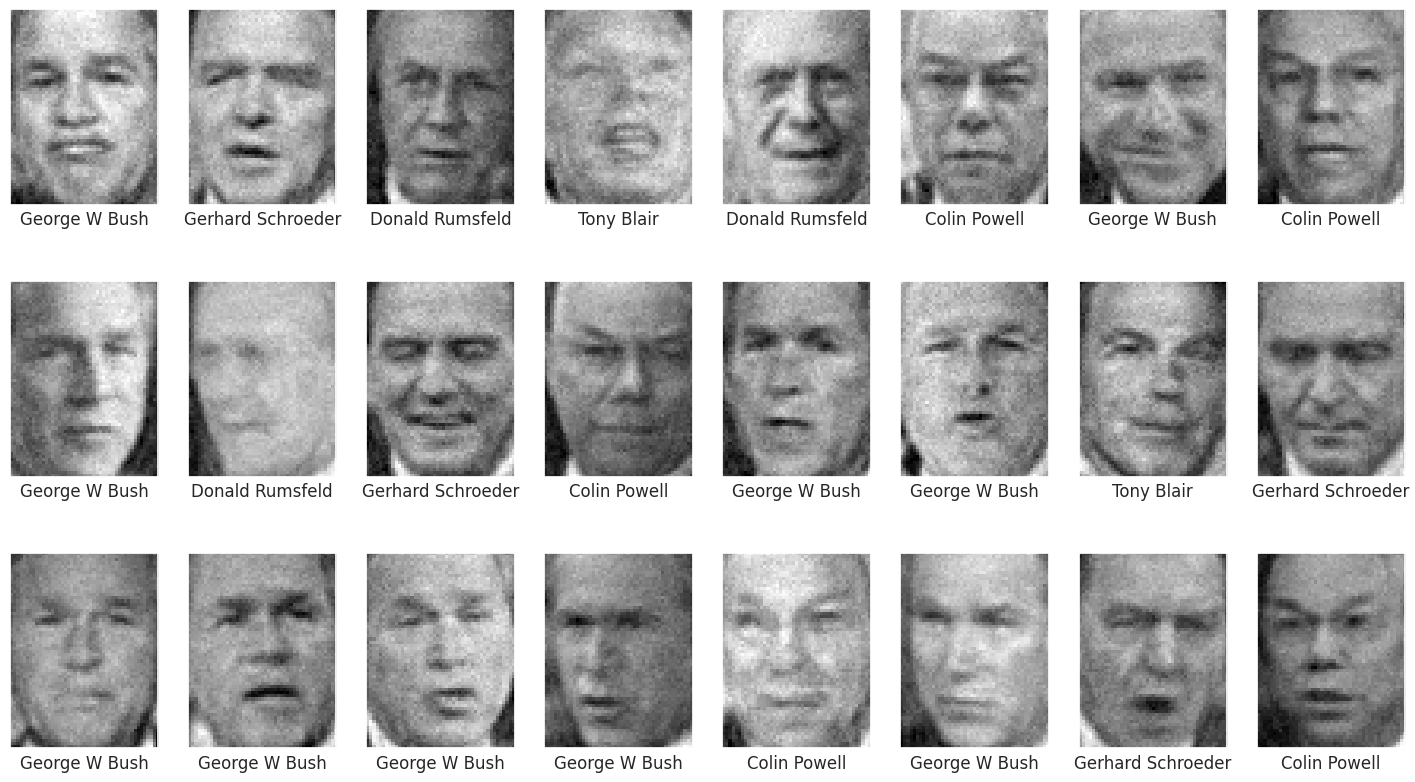

In [16]:
# reconstruct face images
unpca_faces = pca.inverse_transform(pca_faces)

fig, ax = plt.subplots(3, 8, figsize=(18, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(unpca_faces[i].reshape(62, 47), cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

### Anonymizing Data

In [19]:
data = load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
pd.set_option("display.max_columns", 6)
df.head()

,mean radius,mean texture,mean perimeter,...,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,...,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,...,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,...,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,...,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,...,0.1625,0.2364,0.07678


In [22]:
pca = PCA(n_components=30, random_state=0)
pca_data = pca.fit_transform(df)

scaler = StandardScaler()
anon_df = pd.DataFrame(scaler.fit_transform(pca_data))

pd.set_option('display.max_columns', 8)
anon_df.head()

,0,1,2,3,...,26,27,28,29
0,1.743043,-3.440692,1.832695,-1.179529,...,-1.033900,0.767070,1.406020,0.841434
1,1.906779,0.182972,-1.335313,2.418269,...,-0.043492,-0.798802,0.484854,-1.267746
2,1.496120,0.458381,-0.064503,0.568556,...,0.092680,0.010964,-0.547972,0.484234
3,-0.611764,-0.788775,0.327197,-1.592188,...,0.008095,0.811865,-1.511794,-1.978890
4,1.397781,2.216483,0.051866,1.150718,...,1.716566,0.161769,1.260500,0.390467


In [23]:
np.sum(pca.explained_variance_ratio_)

1.0

### Visualizing High-Dimensional Data

/tmp/ipykernel_225765/1611256271.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(pca_digits[:, 0], pca_digits[:, 1], c=digits.target, cmap=plt.cm.get_cmap('Paired', 10))


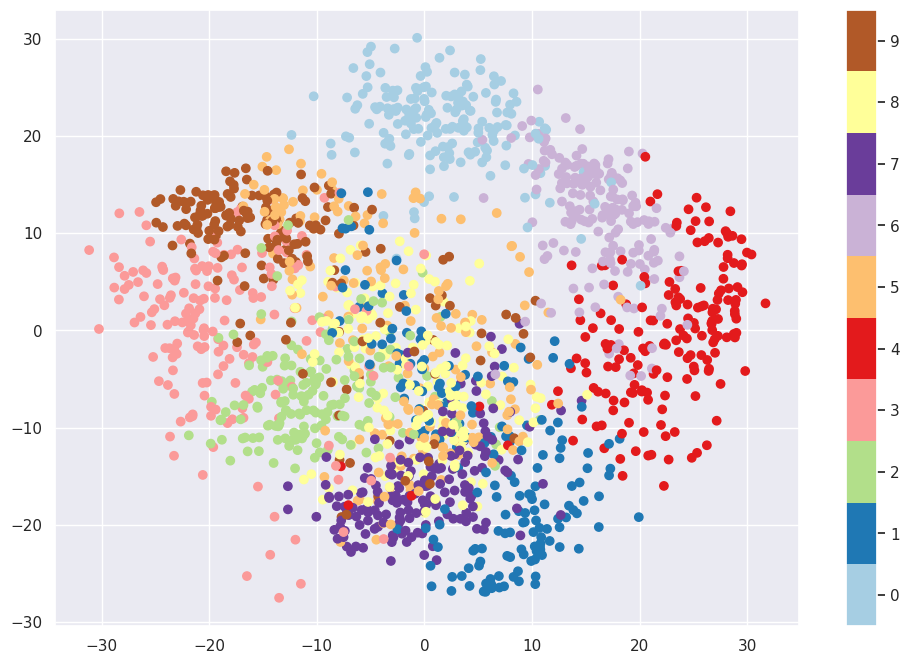

In [28]:
digits = load_digits()
pca = PCA(n_components=2, random_state=0)
pca_digits = pca.fit_transform(digits.data)

plt.figure(figsize=(12, 8))
plt.scatter(pca_digits[:, 0], pca_digits[:, 1], c=digits.target, cmap=plt.cm.get_cmap('Paired', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)

### Visualizing 3D plots

In [34]:
# %matplotlib widget

digits = load_digits()
pca = PCA(n_components=3, random_state=0)
pca_digits = pca.fit_transform(digits.data)

/tmp/ipykernel_225765/476291676.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax.scatter(xs = pca_digits[:, 0], ys = pca_digits[:, 1], zs = pca_digits[:, 2], c=digits.target, cmap=plt.cm.get_cmap('Paired', 10))


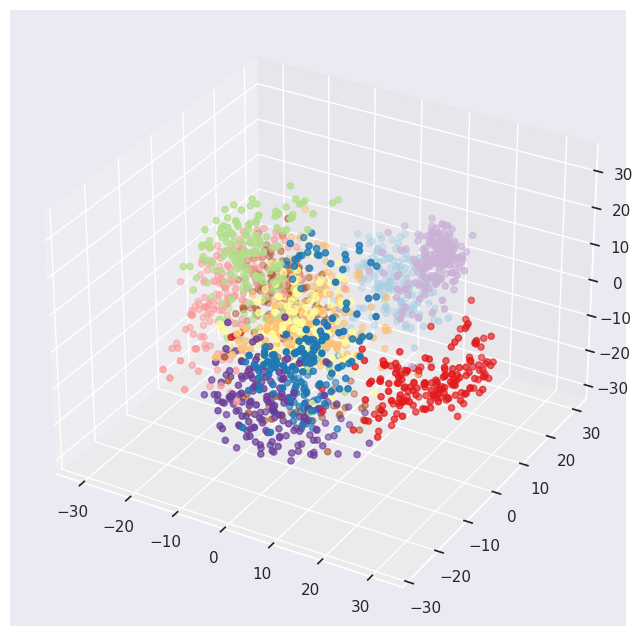

In [35]:
ax = plt.figure(figsize=(12,8)).add_subplot(111, projection="3d")
ax.scatter(xs = pca_digits[:, 0], ys = pca_digits[:, 1], zs = pca_digits[:, 2], c=digits.target, cmap=plt.cm.get_cmap('Paired', 10))

### Visualizing with t-SNE

/tmp/ipykernel_225765/2740423082.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(tsne_digits[:,0], tsne_digits[:,1], c=digits.target, cmap=plt.cm.get_cmap("Paired", 10))


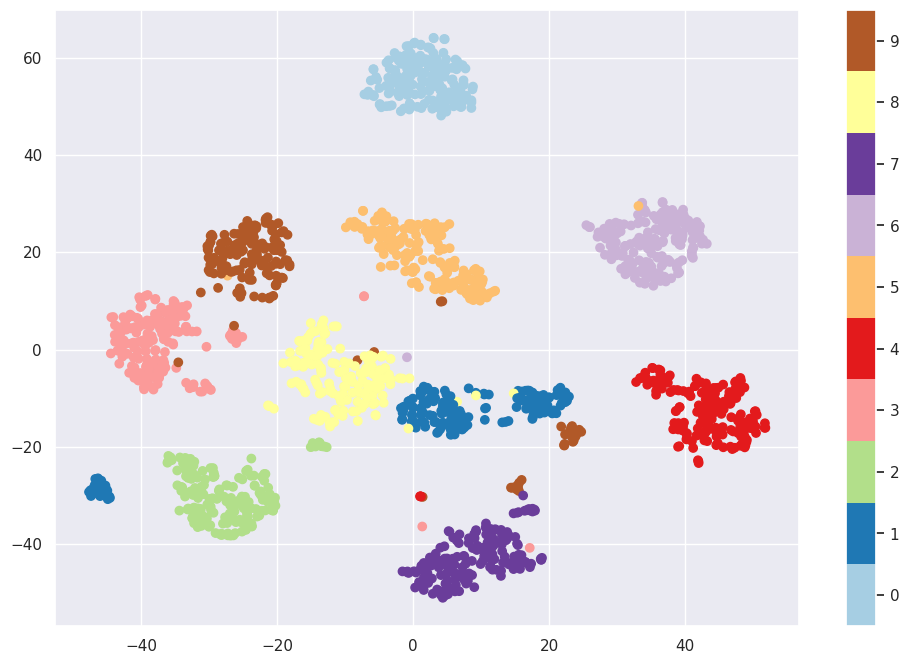

In [36]:
digits = load_digits()
tsne = TSNE(n_components=2, init='pca', learning_rate='auto', random_state=0)
tsne_digits = tsne.fit_transform(digits.data)

plt.figure(figsize=(12, 8))
plt.scatter(tsne_digits[:,0], tsne_digits[:,1], c=digits.target, cmap=plt.cm.get_cmap("Paired", 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)